# Merging all the csv files for lake Sammamish

In [1]:

import pandas as pd 

df_1 = pd.read_csv("../Resources_Ritu/0611_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_2 = pd.read_csv("../Resources_Ritu/0612_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_3 = pd.read_csv("../Resources_Ritu/0614_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_4 = pd.read_csv("../Resources_Ritu/0617_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_5 = pd.read_csv("../Resources_Ritu/0622_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_6 = pd.read_csv("../Resources_Ritu/0625_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

df_7 = pd.read_csv("../Resources_Ritu/M621_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)




In [2]:
# append multiple DataFrames

WQI_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)
print(WQI_df.shape)
WQI_df.head()

(9513, 12)


,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [3]:
# Create the output file (CSV)

output_data_file = "../Resources_Ritu/Big_lake_Sammamish.csv"

# Export the clean water quality data 

WQI_df.to_csv(output_data_file, index="CollectDate")

# Preprocessing the Data for Neural Network

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
#WQI_df = pd.read_csv("../Resources_Ritu/0611_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

WQI_df.head()

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [5]:
# Data Summary

WQI_df.describe()

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,0.019529,104.770451,8.794612,3.175549,0.250499,0.004699,7.749050,12.123462,0.450910,0.015715,88.783753
std,0.019682,6.294638,3.179340,8.541212,0.144454,0.004703,0.697979,4.751851,0.148650,0.010067,43.916247
min,0.010000,80.400000,0.000000,0.000000,0.020000,0.002000,6.100000,5.200000,0.050000,0.005000,12.702527
25%,0.010000,102.000000,8.100000,0.000000,0.149333,0.002000,7.200000,8.300000,0.359333,0.009700,58.949820
50%,0.012833,105.000000,9.400000,1.000000,0.246000,0.002650,7.600000,10.800000,0.436833,0.013800,86.358482
75%,0.020333,108.000000,10.713636,3.000000,0.336000,0.006117,8.300000,15.400000,0.528500,0.018733,114.044974
max,0.359000,165.000000,124.400000,180.000000,1.020000,0.129000,9.700000,25.200000,4.900000,0.193000,349.975650


In [6]:
# convert string to datetime
WQI_df["CollectDate"] = pd.to_datetime(WQI_df["CollectDate"])

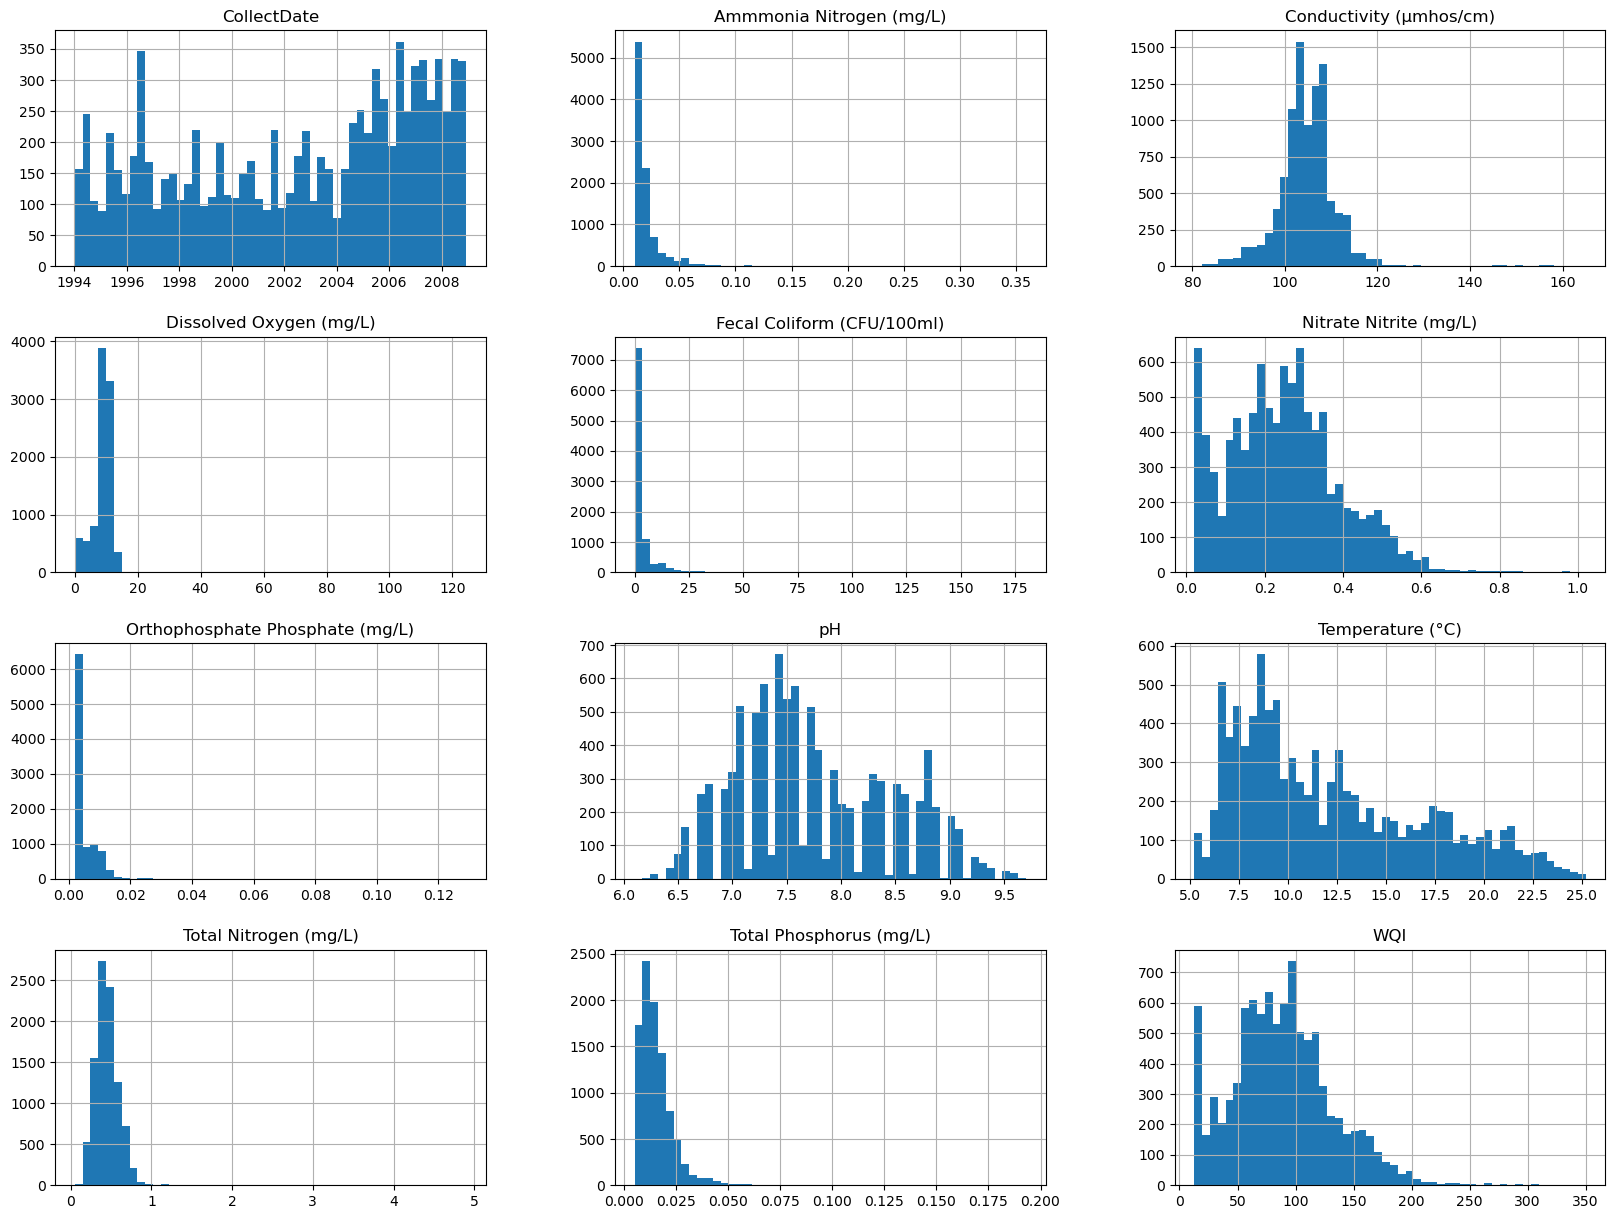

In [7]:
# Histogram shows the number of instances that have a given value range. Using jupyter's magic command to specify which backend Matplotlib should use.
%matplotlib inline
import matplotlib.pyplot as plt
WQI_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: ylabel='Density'>

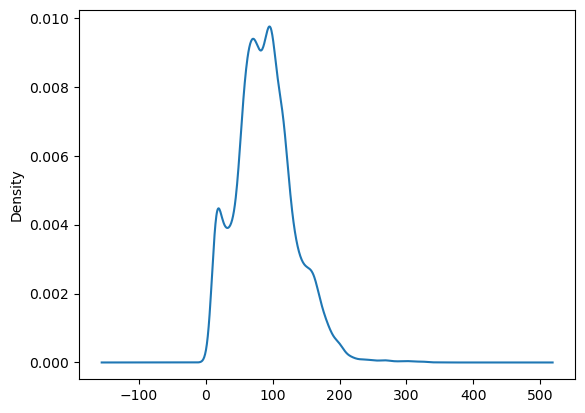

In [8]:
# Visualize the value counts of target variable

WQI_df["WQI"].plot.density()

In [9]:
WQI_df_mean = WQI_df.groupby(["CollectDate"]).mean()
WQI_df_mean.head(20)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.020000,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.020000,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.020000,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.020000,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.020000,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162
1994-04-19,0.020000,104.238462,12.351923,0.961538,0.292167,0.002000,8.769231,10.638462,0.486192,0.014571,101.444971
1994-05-03,0.020000,107.957692,11.314615,0.115385,0.285513,0.002000,8.503846,11.732051,0.460673,0.012199,98.633201
1994-05-24,0.020444,113.768254,10.394286,0.714286,0.279272,0.002000,8.284127,14.087302,0.441579,0.015847,97.992202
1994-06-07,0.020000,107.194340,9.422830,1.886792,0.249138,0.002000,7.805660,13.235849,0.440912,0.019503,89.734223


In [10]:
import seaborn as sns

In [11]:
# pip install seaborn

<AxesSubplot: >

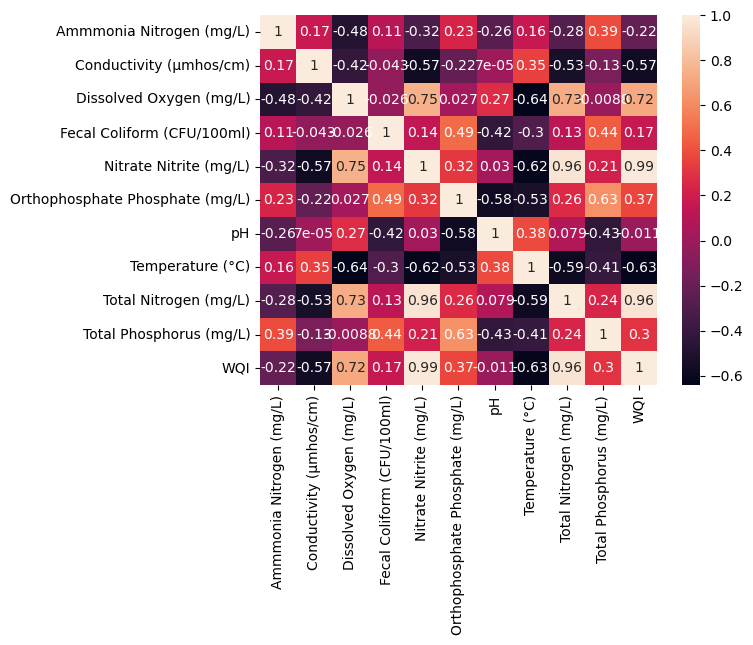

In [12]:
sns.heatmap(WQI_df_mean.corr(), annot=True)

In [13]:
# correlation among the features of each features in the data frame.

corr_matrix = WQI_df_mean.corr()
round(corr_matrix,2)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammmonia Nitrogen (mg/L),1.00,0.17,-0.48,0.11,-0.32,0.23,-0.26,0.16,-0.28,0.39,-0.22
Conductivity (µmhos/cm),0.17,1.00,-0.42,-0.04,-0.57,-0.22,0.00,0.35,-0.53,-0.13,-0.57
Dissolved Oxygen (mg/L),-0.48,-0.42,1.00,-0.03,0.75,0.03,0.27,-0.64,0.73,-0.01,0.72
Fecal Coliform (CFU/100ml),0.11,-0.04,-0.03,1.00,0.14,0.49,-0.42,-0.30,0.13,0.44,0.17
Nitrate Nitrite (mg/L),-0.32,-0.57,0.75,0.14,1.00,0.32,0.03,-0.62,0.96,0.21,0.99
Orthophosphate Phosphate (mg/L),0.23,-0.22,0.03,0.49,0.32,1.00,-0.58,-0.53,0.26,0.63,0.37
pH,-0.26,0.00,0.27,-0.42,0.03,-0.58,1.00,0.38,0.08,-0.43,-0.01
Temperature (°C),0.16,0.35,-0.64,-0.30,-0.62,-0.53,0.38,1.00,-0.59,-0.41,-0.63
Total Nitrogen (mg/L),-0.28,-0.53,0.73,0.13,0.96,0.26,0.08,-0.59,1.00,0.24,0.96
Total Phosphorus (mg/L),0.39,-0.13,-0.01,0.44,0.21,0.63,-0.43,-0.41,0.24,1.00,0.30


In [14]:
# Looking for the correlations between WQI and rest of the features

corr_matrix = WQI_df_mean.corr()

round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.99
Total Nitrogen (mg/L)              0.96
Dissolved Oxygen (mg/L)            0.72
Orthophosphate Phosphate (mg/L)    0.37
Total Phosphorus (mg/L)            0.30
Fecal Coliform (CFU/100ml)         0.17
pH                                -0.01
Ammmonia Nitrogen (mg/L)          -0.22
Conductivity (µmhos/cm)           -0.57
Temperature (°C)                  -0.63
Name: WQI, dtype: float64

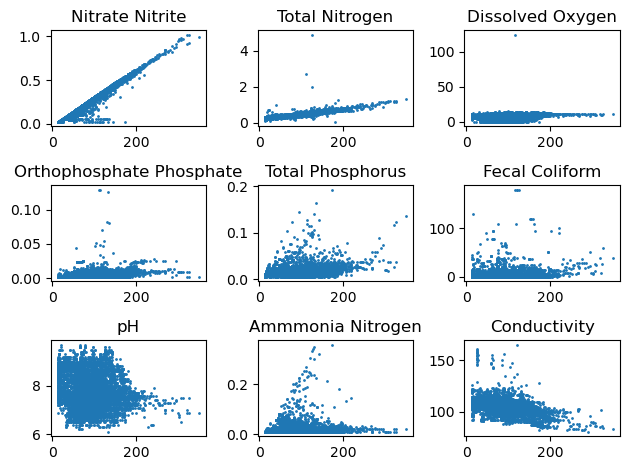

In [15]:
# Scatter plots for each feature with Water Quality Index "WQI"

fig,axis=plt.subplots(3,3)
axis[0,0].scatter(WQI_df["WQI"],WQI_df["Nitrate Nitrite (mg/L)"], s=1) 
axis[0, 0].set_title('Nitrate Nitrite')
axis[0,1].scatter(WQI_df["WQI"],WQI_df["Total Nitrogen (mg/L)"], s=1)
axis[0, 1].set_title('Total Nitrogen')
axis[0,2].scatter(WQI_df["WQI"],WQI_df["Dissolved Oxygen (mg/L)"], s=1)
axis[0, 2].set_title('Dissolved Oxygen')
axis[1,0].scatter(WQI_df["WQI"],WQI_df["Orthophosphate Phosphate (mg/L)"], s=1)
axis[1,0].set_title('Orthophosphate Phosphate')
axis[1,1].scatter(WQI_df["WQI"],WQI_df["Total Phosphorus (mg/L)"], s=1)
axis[1,1].set_title('Total Phosphorus')
axis[1,2].scatter(WQI_df["WQI"],WQI_df["Fecal Coliform (CFU/100ml)"], s=1)
axis[1,2].set_title('Fecal Coliform')
axis[2,0].scatter(WQI_df["WQI"],WQI_df["pH"], s=1)
axis[2,0].set_title('pH')
axis[2,1].scatter(WQI_df["WQI"],WQI_df["Ammmonia Nitrogen (mg/L)"], s=1)
axis[2,1].set_title('Ammmonia Nitrogen')
axis[2,2].scatter(WQI_df["WQI"],WQI_df["Conductivity (µmhos/cm)"], s=1)
axis[2,2].set_title('Conductivity')
plt.tight_layout()
plt.show()

C:\Users\gothw\anaconda3\envs\ul\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Temperature (°C)', ylabel='WQI'>

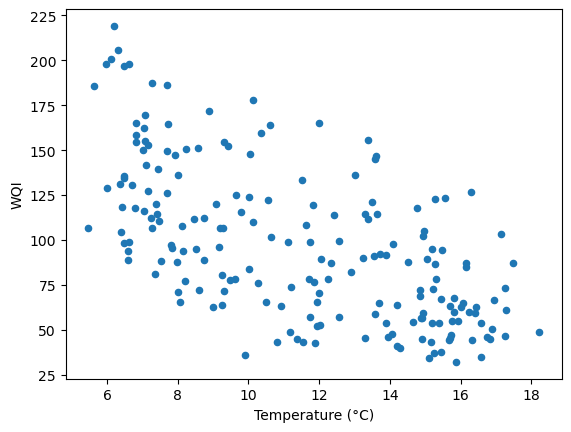

In [16]:
WQI_df_mean.plot(kind="scatter", x="Temperature (°C)", y="WQI")

In [17]:
WQI_df.dtypes

CollectDate                        datetime64[ns]
Ammmonia Nitrogen (mg/L)                  float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                        float64
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
WQI                                       float64
dtype: object

In [18]:
WQI_df_1 = WQI_df.drop(columns=["CollectDate"])
WQI_df_1.head()

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [19]:
WQI_df_1["WQI"] = round(WQI_df_1["WQI"],2)

# Compile, Train and Evaluate the Model

In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf




In [21]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

X = WQI_df_1.drop(["WQI"],1).values
y = WQI_df_1["WQI"].values.reshape(-1,1)


# To check the number of shapes
print(X.shape)
print(y.shape)

# To check the first five entries
print(y[:5])


(9513, 10)
(9513, 1)
[[ 94.89]
 [ 98.7 ]
 [101.55]
 [ 98.72]
 [ 98.72]]


C:\Users\gothw\AppData\Local\Temp\ipykernel_62216\194459523.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = WQI_df_1.drop(["WQI"],1).values


In [22]:
# Create a StandardScaler instances
scaler_X = skl.preprocessing.StandardScaler()
scaler_y = skl.preprocessing.StandardScaler()

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Fit the scaler
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Scale the data
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)
y_train
y_test

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)


(7134, 10)
(7134, 1)
(2379, 10)
(2379, 1)


In [23]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 10
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="linear"))


# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [24]:
#from keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)

In [25]:
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer="adam", metrics=["mse"])
model.compile(loss='mean_squared_error', optimizer="adam")

In [26]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
223/223 [==============================] - 1s 2ms/step - loss: 7363.2822 - val_loss: 2700.8066
Epoch 2/100
223/223 [==============================] - 0s 1ms/step - loss: 1054.9432 - val_loss: 584.3333
Epoch 3/100
223/223 [==============================] - 0s 1ms/step - loss: 535.1725 - val_loss: 400.8478
Epoch 4/100
223/223 [==============================] - 0s 1ms/step - loss: 393.6333 - val_loss: 281.0654
Epoch 5/100
223/223 [==============================] - 0s 1ms/step - loss: 291.3945 - val_loss: 202.0547
Epoch 6/100
223/223 [==============================] - 0s 1ms/step - loss: 216.0389 - val_loss: 146.7723
Epoch 7/100
223/223 [==============================] - 0s 1ms/step - loss: 164.8868 - val_loss: 109.8281
Epoch 8/100
223/223 [==============================] - 0s 1ms/step - loss: 127.5533 - val_loss: 84.7939
Epoch 9/100
223/223 [==============================] - 0s 1ms/step - loss: 100.3207 - val_loss: 66.5260
Epoch 10/100
223/223 [==============================] 

Epoch 81/100
223/223 [==============================] - 1s 3ms/step - loss: 0.0835 - val_loss: 0.4339
Epoch 82/100
223/223 [==============================] - 1s 3ms/step - loss: 0.0585 - val_loss: 0.0922
Epoch 83/100
223/223 [==============================] - 1s 3ms/step - loss: 0.0439 - val_loss: 0.2058
Epoch 84/100
223/223 [==============================] - 1s 2ms/step - loss: 0.0676 - val_loss: 0.2023
Epoch 85/100
223/223 [==============================] - 1s 3ms/step - loss: 0.0672 - val_loss: 0.3026
Epoch 86/100
223/223 [==============================] - 1s 3ms/step - loss: 0.1255 - val_loss: 0.1329
Epoch 87/100
223/223 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.4338
Epoch 88/100
223/223 [==============================] - 1s 4ms/step - loss: 0.2344 - val_loss: 0.0868
Epoch 89/100
223/223 [==============================] - 1s 4ms/step - loss: 0.0826 - val_loss: 0.1169
Epoch 90/100
223/223 [==============================] - 1s 3ms/step - loss: 0.0466

In [27]:
# Making predictions using the testing data.
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print(y_pred)


75/75 [==============================] - 0s 2ms/step
(2379, 1)
[[ 94.65005 ]
 [ 70.60105 ]
 [ 98.938644]
 ...
 [164.1063  ]
 [ 47.792282]
 [110.392555]]


In [28]:

print(y_test)

[[ 94.93]
 [ 71.04]
 [ 99.44]
 ...
 [164.89]
 [ 47.9 ]
 [111.03]]


In [29]:
y_pred_new = []
for i in y_pred:
    y_pred_new.append(i[0])
    
y_test_new = []
for i in y_test:
    y_test_new.append(i[0])

In [30]:
import pandas as pd

accuracy_df = pd.DataFrame({"Prediction":y_pred_new, "Actual":y_test_new})
accuracy_df.head(20)


,Prediction,Actual
0,94.650047,94.93
1,70.601051,71.04
2,98.938644,99.44
3,211.369461,212.42
4,165.631699,166.89
5,81.108307,81.42
6,182.699356,183.53
7,66.490593,66.86
8,91.833054,92.20
9,98.395493,98.94


In [31]:
# evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.325, Test: 0.404


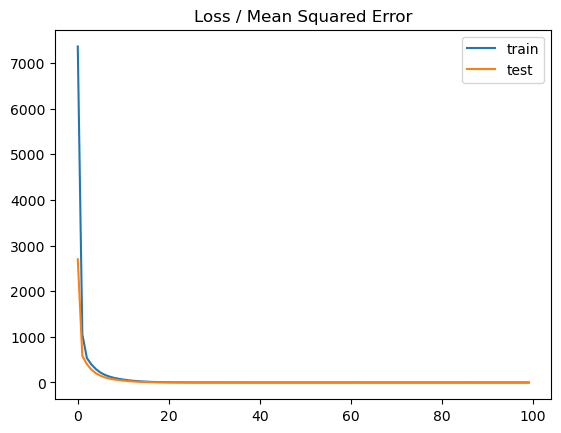

In [32]:
from matplotlib import pyplot
#plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.legend()
pyplot.show()

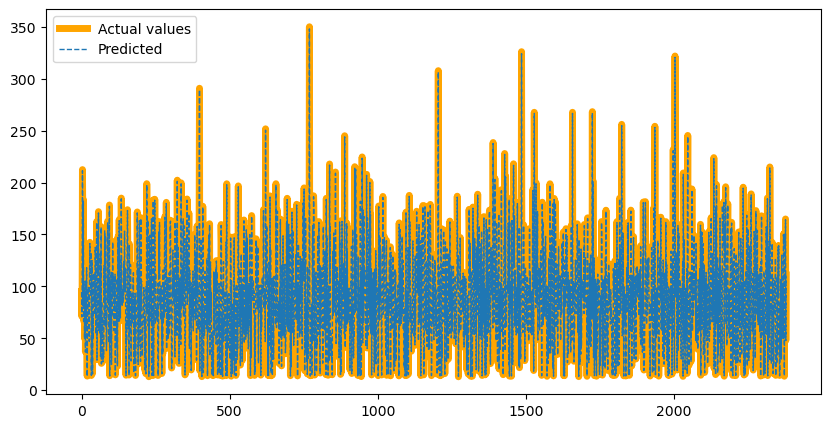

In [54]:
from matplotlib import pyplot
plt.figure(figsize=(10, 5))
plt.title('')
plt.plot(accuracy_df['Actual'], label='Actual values', color='orange', linewidth=5)
plt.plot(accuracy_df['Prediction'], label='Predicted', linewidth=1, linestyle='dashed')
plt.legend()
plt.show()

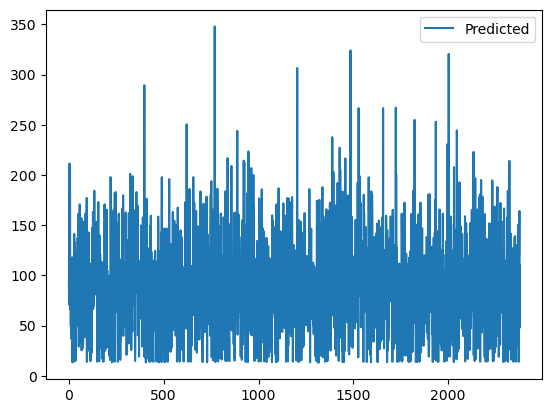

In [39]:
from matplotlib import pyplot
plt.title('')
#plt.plot(accuracy_df['Actual'], label='Actual values')
plt.plot(accuracy_df['Prediction'], label='Predicted')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


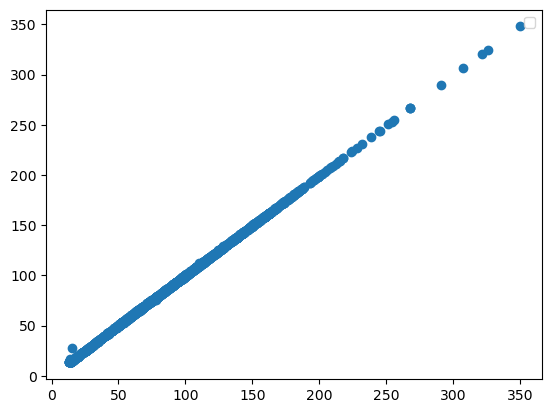

In [37]:
from matplotlib import pyplot
plt.title('')
x=accuracy_df['Actual']
y=accuracy_df['Prediction']
plt.scatter(x,y)

plt.legend()
plt.show()
